## Ejemplo 01

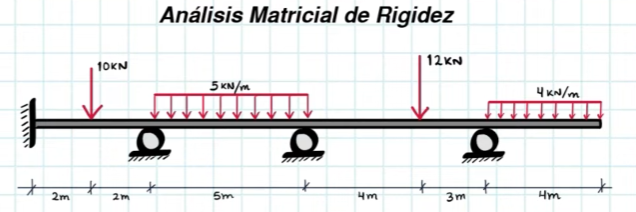

### Características

* Tiene 5 nodos
* Tiene 4 barras

### Nodos

```
1. ( 0, 0) -> A
2. ( 4, 0) -> B
3. ( 9, 0) -> C
4. (16, 0) -> D
5. (20, 0) -> E
```


### Soportes

`EA` approx. inf.

```
          ∆x  ∆y  θ     ∆y  θ
1. N1 -> ( 0,  0, 0) = ( 0, 0) 
2. N2 -> ( 0,  0, 1) = ( 0, 1) 
3. N3 -> ( 0,  0, 1) = ( 0, 1) 
4. N4 -> ( 0,  0, 1) = ( 0, 1) 
5. N5 -> ( 0,  1, 1) = ( 1, 1) 
```

### Barras

`EI` constante.

```
1. 1-2 | 2-1 : EI = 1
2. 2-3 | 3-2 : EI = 1
3. 3-4 | 4-3 : EI = 1
4. 4-5 | 5-4 : EI = 1
```


## Código

In [89]:
import numpy as np
import xarray as x

np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Nodos

```
1. ( 0, 0) -> A
2. ( 4, 0) -> B
3. ( 9, 0) -> C
4. (16, 0) -> D
5. (20, 0) -> E
```

In [13]:
N = np.array([[ 0, 0],
              [ 4, 0],
              [ 9, 0],
              [16, 0],
              [20, 0]])

In [19]:
S = np.array(
    [
        [0, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 1],
    ]
)

In [7]:
EI_1 = 1

In [27]:
B = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
])

In [78]:
np.diff(N[B], axis=1).squeeze()

array([[4, 0],
       [5, 0],
       [7, 0],
       [4, 0]])

In [86]:
x, y = np.diff(N[B], axis=1).squeeze().T

In [99]:
with np.errstate(divide='ignore'):
    alpha = np.arctan(np.divide(*(np.diff(N[B], axis=1).squeeze().T[::-1])))
alpha

array([0., 0., 0., 0.])

In [ ]:
alpha = []
for start, end in B:
    dx, dy = (N[start] - N[end]).T
    
alpha = np.array(alpha)
alpha

In [55]:
L = np.linalg.norm(np.diff(N[B], axis=1), axis=2)
L

array([[4.],
       [5.],
       [7.],
       [4.]])

In [58]:
EI = np.ones(shape=(len(B), 1)) * EI_1
EI

array([[1.],
       [1.],
       [1.],
       [1.]])